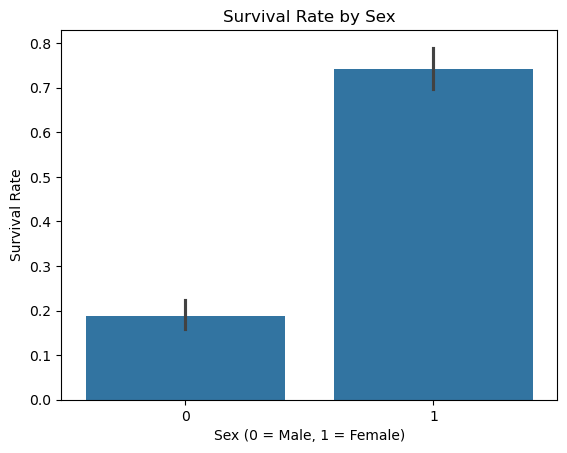

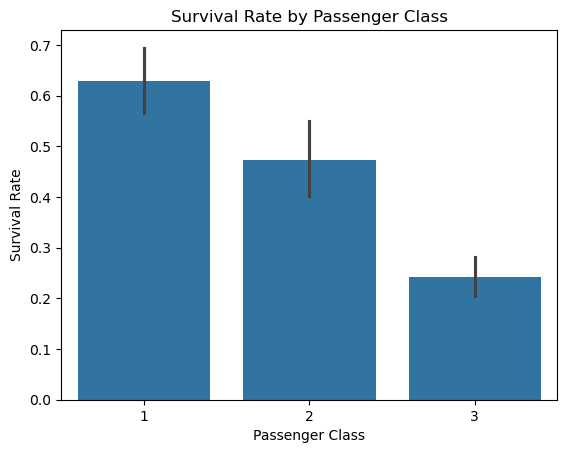

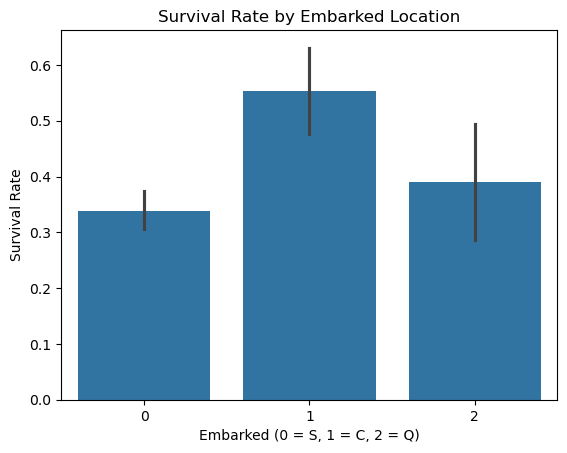

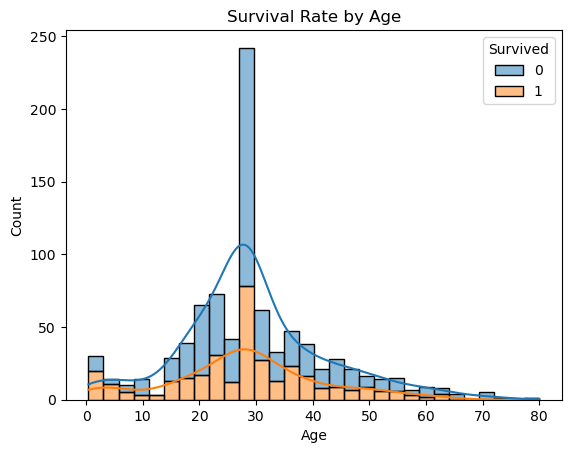

Logistic Regression Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Support Vector Machines Accuracy: 0.6536312849162011
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179

Naive Bayes Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0

In [10]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Extract the contents of the zip file
zip_file_path = r'C:\Users\yparm\Downloads\titanic.zip'  # Using raw string literal
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/mnt/data/')

# Load the dataset
file_path = '/mnt/data/train.csv'  # Assuming the file name is 'train.csv'
titanic_df = pd.read_csv(file_path)

# Data Cleaning
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])
titanic_df = titanic_df.drop(columns=['Cabin'])
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
titanic_df = titanic_df.drop(columns=['Name', 'Ticket', 'PassengerId'])

# EDA
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

sns.barplot(x='Embarked', y='Survived', data=titanic_df)
plt.title('Survival Rate by Embarked Location')
plt.xlabel('Embarked (0 = S, 1 = C, 2 = Q)')
plt.ylabel('Survival Rate')
plt.show()

sns.histplot(data=titanic_df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Define features and target variable
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machines': SVC(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

scores = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print(f'{model_name} Accuracy: {score}')
    print(classification_report(y_test, y_pred))

# Create results DataFrame
results = pd.DataFrame({
    'Model': list(models.keys()),
    'Score': scores
})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df.head(9))
